In [ ]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset

df = pd.read_csv("/content/drive/MyDrive/NPHA-doctor-visits.csv")

In [ ]:
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


# Data Preparation

In [ ]:
df = df.rename(columns={'Phyiscal Health': 'Physical Health'}) # Renaming columns
df.apply(np.unique) # Checking unique values in each column

Number of Doctors Visited                                  [1, 2, 3]
Age                                                              [2]
Physical Health                                  [-1, 1, 2, 3, 4, 5]
Mental Health                                    [-1, 1, 2, 3, 4, 5]
Dental Health                                 [-1, 1, 2, 3, 4, 5, 6]
Employment                                              [1, 2, 3, 4]
Stress Keeps Patient from Sleeping                            [0, 1]
Medication Keeps Patient from Sleeping                        [0, 1]
Pain Keeps Patient from Sleeping                              [0, 1]
Bathroom Needs Keeps Patient from Sleeping                    [0, 1]
Uknown Keeps Patient from Sleeping                            [0, 1]
Trouble Sleeping                                       [-1, 1, 2, 3]
Prescription Sleep Medication                          [-1, 1, 2, 3]
Race                                                 [1, 2, 3, 4, 5]
Gender                            

Here are the observations:

1) Age only has one value, therefore it does not contribute, we'll drop the column.

2) values that are equal to "-1" mean the patient refused to give information. We need to assess the number of instances that has happened to proceed.


In [ ]:
df = df.drop(['Age'], axis=1) # Dropping 'Age' column

df_filtered = df.copy() # Making a copy for filtered dataset

# List of columns to filter
columns = ['Physical Health',
           'Mental Health',
           'Dental Health',
           'Trouble Sleeping',
           'Prescription Sleep Medication']

# Iterate through the columns and filter
for column in columns:
    df_filtered = df_filtered[df_filtered[column] != -1]

In [ ]:
print(f'Unclean dataset shape: {df.shape}')
print(f'Cleaned dataset shape: {df_filtered.shape}')

Unclean dataset shape: (714, 14)
Cleaned dataset shape: (696, 14)


Since there are only 18 instances where "-1" is present, let us try using logistic regression on both the filtered (without "-1") and unfiltered (with "-1") dataframes. If the performance of the filetered dataframe is significantly better, we can move forward with it else we can just use the unfiltered dataframe.  

In [ ]:
# Separating target and features in both filtered and unfiltered dataframe

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_filtered = df_filtered.iloc[:, 1:].values
y_filtered = df_filtered.iloc[:, 0].values

In [ ]:
print(X)

[[4 3 3 ... 3 1 2]
 [4 2 3 ... 3 1 1]
 [3 2 3 ... 3 4 1]
 ...
 [4 2 3 ... 3 1 1]
 [3 1 3 ... 3 1 2]
 [3 2 2 ... 3 1 1]]


In [ ]:
print(y)

[3 2 3 1 3 2 3 2 2 1 2 2 1 2 3 3 2 3 2 2 3 3 1 2 3 3 2 2 2 3 1 1 1 3 2 3 2
 2 1 3 2 2 2 3 2 1 2 2 3 2 2 2 2 3 2 2 2 2 3 3 3 2 1 2 3 1 2 2 1 2 3 2 2 3
 1 3 1 2 2 2 3 2 2 2 2 2 2 1 1 2 2 2 3 1 2 1 2 1 2 2 2 3 1 2 2 2 2 2 2 3 3
 1 3 3 1 1 1 1 3 2 2 1 2 2 2 1 2 3 3 3 2 1 3 2 2 3 2 2 2 3 3 3 2 2 3 2 2 2
 1 2 2 3 2 2 2 3 2 1 2 3 1 2 2 2 2 2 2 3 2 2 1 2 1 2 3 2 2 2 2 3 2 3 1 2 2
 1 1 3 3 2 1 2 2 1 2 2 2 2 2 2 2 3 2 3 3 1 3 2 2 1 2 2 3 2 3 3 3 2 2 2 2 3
 3 3 3 2 1 1 1 2 1 2 2 1 2 2 2 2 2 2 2 3 2 2 2 3 3 2 1 3 3 1 3 3 3 3 3 2 1
 2 3 2 2 3 3 2 2 2 1 3 1 1 2 1 2 3 2 1 2 2 3 2 2 3 2 1 2 2 3 3 2 2 2 2 2 2
 3 2 2 1 3 2 2 3 1 2 3 1 2 2 2 1 1 1 3 3 1 3 1 2 2 3 2 3 1 2 2 1 3 1 2 1 2
 3 3 3 3 2 3 3 3 2 3 2 1 2 2 3 2 2 3 1 1 3 1 2 3 2 2 2 3 1 2 3 3 3 3 2 3 2
 2 2 2 3 2 2 2 1 2 2 2 2 2 2 2 2 2 1 3 2 3 3 2 2 3 1 3 1 1 2 3 3 2 3 2 2 1
 1 2 2 1 3 3 3 2 1 3 2 2 3 2 3 1 2 2 1 2 2 3 2 3 2 2 2 3 1 3 3 2 1 2 3 2 3
 2 2 1 3 2 2 1 2 2 2 3 1 2 2 2 1 2 2 3 2 2 3 3 1 2 2 2 2 2 1 2 2 3 3 2 2 1
 2 2 2 1 2 2 1 3 2 2 2 3 

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.25, stratify = y_filtered, random_state=42)

In [ ]:
print(f"Number of samples and attributes: {X_train.shape}")
print(f"Number of samples and attributes in filtered dataframe: {X_train_filtered.shape}")

Number of samples and attributes: (535, 13)
Number of samples and attributes in filtered dataframe: (522, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Visualisation (TSNE)

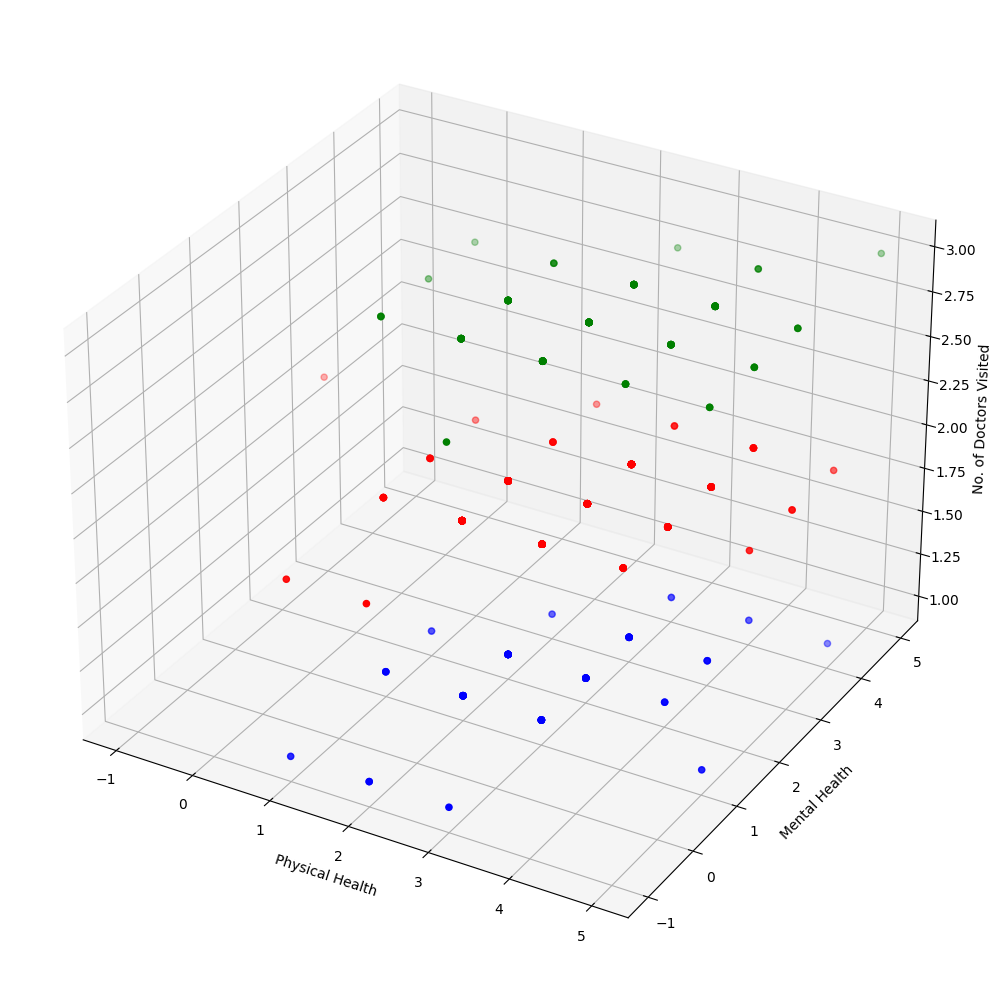

In [ ]:
# Visualising the dataset with limited features and target value in 3D

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], y_train[y_train==1], color="b");
ax.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], y_train[y_train==2], color="r");
ax.scatter(X_train[y_train==3, 0], X_train[y_train==3, 1], y_train[y_train==3], color="g");

ax.set_xlabel("Physical Health")
ax.set_ylabel("Mental Health")
ax.set_zlabel("No. of Doctors Visited")

plt.tight_layout()
plt.show()

In [ ]:
print(np.unique(y_train, return_counts=True))

(array([1, 2, 3]), array([ 98, 279, 158]))


Since there are only 6 values for each of the two features in the above graph, the points are overlapping. Let's try using TSNE.


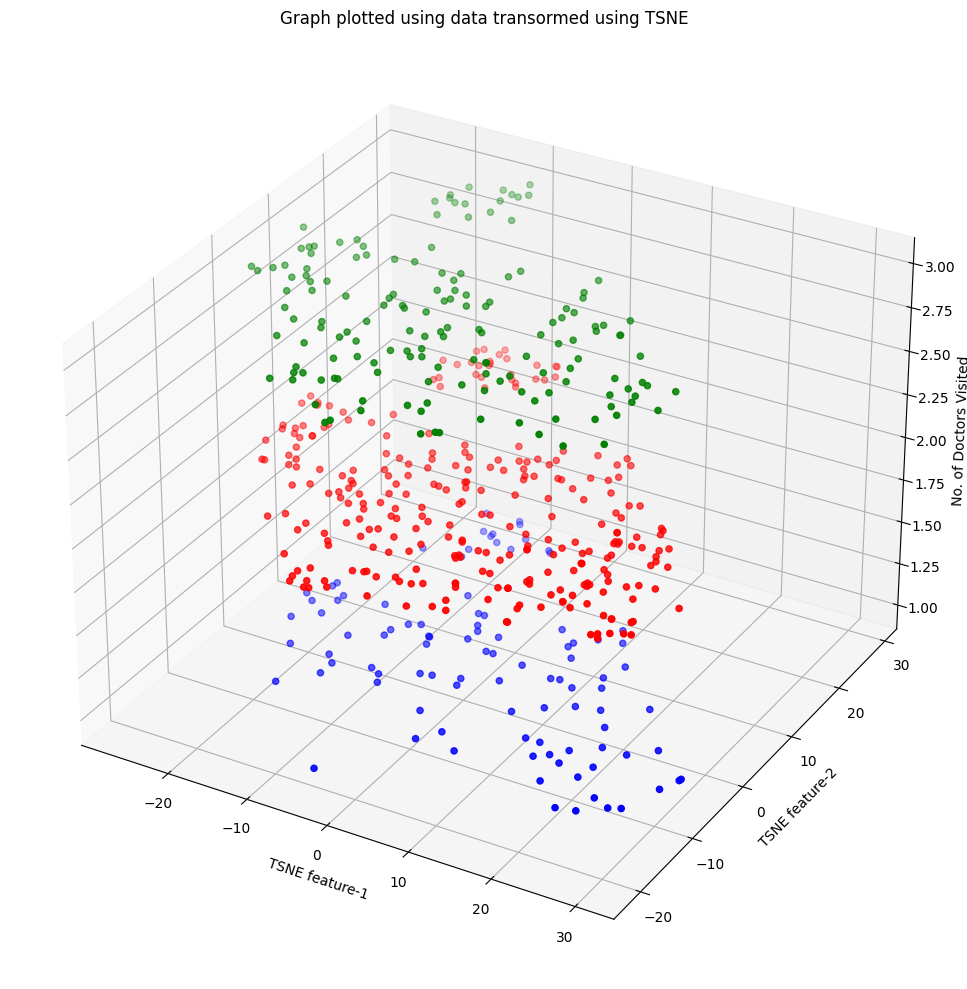

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit(X_train)

X_train_tsne = tsne.fit_transform(X_train)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_tsne[y_train==1, 0], X_train_tsne[y_train==1, 1], y_train[y_train==1], color="b");
ax.scatter(X_train_tsne[y_train==2, 0], X_train_tsne[y_train==2, 1], y_train[y_train==2], color="r");
ax.scatter(X_train_tsne[y_train==3, 0], X_train_tsne[y_train==3, 1], y_train[y_train==3], color="g");

ax.set_title("Graph plotted using data transormed using TSNE")
ax.set_xlabel("TSNE feature-1")
ax.set_ylabel("TSNE feature-2")
ax.set_zlabel("No. of Doctors Visited")

plt.tight_layout()
plt.show()

# Hyperparameter Tuning

**Support Vector Machine - RBF kernel**

In [ ]:
from sklearn import svm
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

svm_params = {
    'C': uniform(1, 15),
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'] + list(uniform(0.0001, 1).rvs(10)),
    'class_weight': ['balanced', None]
}

svmclassifier = svm.SVC()

svm_search = RandomizedSearchCV(svmclassifier, svm_params, n_iter=100, n_jobs=-1, cv=5, verbose=1, random_state=42)

In [ ]:
svm_search.fit(X_train, y_train)

print("Best parameters:", svm_search.best_params_)
print("Best score:", svm_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 3.638878790160181, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.530841121495327


In [ ]:
print(f'Classification accuracy using SVM on test set after tuning is {svm_search.score(X_test, y_test)}')

Classification accuracy using SVM on test set after tuning is 0.5139664804469274


In [ ]:
svm_search_scaled = RandomizedSearchCV(svmclassifier, svm_params, n_iter=10, n_jobs=-1, cv=5, verbose=1, random_state=31)
# Changed random_state because same "Best parameters"

svm_search_scaled = svm_search_scaled.fit(X_train_scaled, y_train)

print("Best parameters:", svm_search_scaled.best_params_)
print("Best score:", svm_search_scaled.best_score_)

print(f'Classification accuracy using SVM on test set after tuning is {svm_search_scaled.score(X_test_scaled, y_test)}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 2.3409957477710197, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.48785046728971954
Classification accuracy using SVM on test set after tuning is 0.5083798882681564


Even though the best parameters have changed between the scaled and unscaled data, that does not seem to have impacted any of the scores. Infact the scores are the same for both the scaled and unscaled versions

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(10, 20),
    'min_samples_leaf': randint(10, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

decisionTree = DecisionTreeClassifier()

dt_search = RandomizedSearchCV(decisionTree, dt_params, n_iter=100, n_jobs=-1, cv=5, verbose=1, random_state=42)

In [ ]:
dt_search.fit(X_train, y_train)

print("Best parameters:", dt_search.best_params_)
print("Best score:", dt_search.best_score_)

print(f'Classification accuracy using decision tree classifier is {dt_search.score(X_test, y_test)}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 14, 'min_samples_split': 19}
Best score: 0.5252336448598129
Classification accuracy using decision tree classifier is 0.5195530726256983


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_params = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomForest = RandomForestClassifier()

rf_search = RandomizedSearchCV(randomForest, rf_params, n_iter=100, n_jobs=-1, cv=5, verbose=1, random_state=42)


In [ ]:
rf_search.fit(X_train, y_train)

print("Best parameters:", rf_search.best_params_)
print("Best score:", rf_search.best_score_)
print(f'Model accuracy on test data: {rf_search.score(X_test, y_test)}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 241}
Best score: 0.5233644859813082
Model accuracy on test data: 0.5195530726256983


**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_params = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 1),
    'algorithm': ['SAMME', 'SAMME.R']
}

adaBoost = AdaBoostClassifier()

ada_search = RandomizedSearchCV(adaBoost, ada_params, n_iter=100, n_jobs=-1, cv=5, verbose=1, random_state=42)
adaBoost = AdaBoostClassifier()

In [ ]:
ada_search.fit(X_train, y_train)

print("Best parameters:", ada_search.best_params_)
print("Best score:", ada_search.best_score_)

print(f'Classification accuracy using adaptive boosting is {ada_search.score(X_test, y_test)}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.8280147659224931, 'n_estimators': 282}
Best score: 0.5289719626168223
Classification accuracy using adaptive boosting is 0.5363128491620112


**Gradient Boost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats


gb_dist = {
    'n_estimators': stats.randint(100, 501),
    'learning_rate': stats.uniform(0.01, 1),
    'max_depth': stats.randint(3, 8)
}

gboost = GradientBoostingClassifier()
gboost_search = RandomizedSearchCV(gboost, gb_dist, cv=5, n_iter=100, random_state=42, verbose=1)

In [ ]:
gboost_search.fit(X_train, y_train)

print("Best parameters:", gboost_search.best_params_)
print("Best score:", gboost_search.best_score_)

print(f'Classification accuracy using gradient boosting is {gboost_search.score(X_test, y_test)}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'learning_rate': 0.017066305219717408, 'max_depth': 3, 'n_estimators': 148}
Best score: 0.5065420560747664
Classification accuracy using gradient boosting is 0.5251396648044693


# Results after hyperparameter tuning

In [ ]:
# Tabulating model scores without tuning

svmclassifier.fit(X_train, y_train)
decisionTree.fit(X_train, y_train)
randomForest.fit(X_train, y_train)
adaBoost.fit(X_train, y_train)
gboost.fit(X_train, y_train)

model_scores_test = {
    'SVM': svmclassifier.score(X_test, y_test),
    'Decision Tree': decisionTree.score(X_test, y_test),
    'Random Forest': randomForest.score(X_test, y_test),
    'AdaBoost': adaBoost.score(X_test, y_test),
    'Gradient Boosting': gboost.score(X_test, y_test)
}

# Create a DataFrame from the scores
df_scores = pd.DataFrame(list(model_scores_test.items()), columns=['Model', 'Model score'])
df_scores

,Model,Model score
0,SVM,0.519553
1,Decision Tree,0.363128
2,Random Forest,0.458101
3,AdaBoost,0.508380
4,Gradient Boosting,0.530726


In [ ]:
model_scores_train = {
    'SVM': svmclassifier.score(X_train, y_train),
    'Decision Tree': decisionTree.score(X_train, y_train),
    'Random Forest': randomForest.score(X_train, y_train),
    'AdaBoost': adaBoost.score(X_train, y_train),
    'Gradient Boosting': gboost.score(X_train, y_train)
}

# Create a DataFrame from the scores
df_scores = pd.DataFrame(list(model_scores_train.items()), columns=['Model', 'Model score'])
df_scores

,Model,Model score
0,SVM,0.521495
1,Decision Tree,0.945794
2,Random Forest,0.945794
3,AdaBoost,0.508411
4,Gradient Boosting,0.702804


In [ ]:
# Dictionary for storing tuned model scores on testing data

hyperparam_tuned_test_modelscores = {
    'SVM tuned': svm_search.score(X_test, y_test),
    'Decision Tree tuned': dt_search.score(X_test, y_test),
    'Random Forest tuned': rf_search.score(X_test, y_test),
    'AdaBoost tuned': ada_search.score(X_test, y_test),
    'Gradient Boosting tuned': gboost_search.score(X_test, y_test)
}

df_scores = pd.DataFrame(list(hyperparam_tuned_test_modelscores.items()), columns=['Model', 'Model score'])
df_scores

,Model,Model score
0,SVM tuned,0.513966
1,Decision Tree tuned,0.519553
2,Random Forest tuned,0.519553
3,AdaBoost tuned,0.536313
4,Gradient Boosting tuned,0.525140


In [ ]:
# Dictionary for storing tuned model scores on training data

hyperparam_tuned_train_modelscores = {
    'SVM tuned': svm_search.score(X_train, y_train),
    'Decision Tree tuned': dt_search.score(X_train, y_train),
    'Random Forest tuned': rf_search.score(X_train, y_train),
    'AdaBoost tuned': ada_search.score(X_train, y_train),
    'Gradient Boosting tuned': gboost_search.score(X_train, y_train)
}

df_scores = pd.DataFrame(list(hyperparam_tuned_train_modelscores.items()), columns=['Model', 'Model score'])
df_scores

,Model,Model score
0,SVM tuned,0.568224
1,Decision Tree tuned,0.521495
2,Random Forest tuned,0.527103
3,AdaBoost tuned,0.534579
4,Gradient Boosting tuned,0.583178


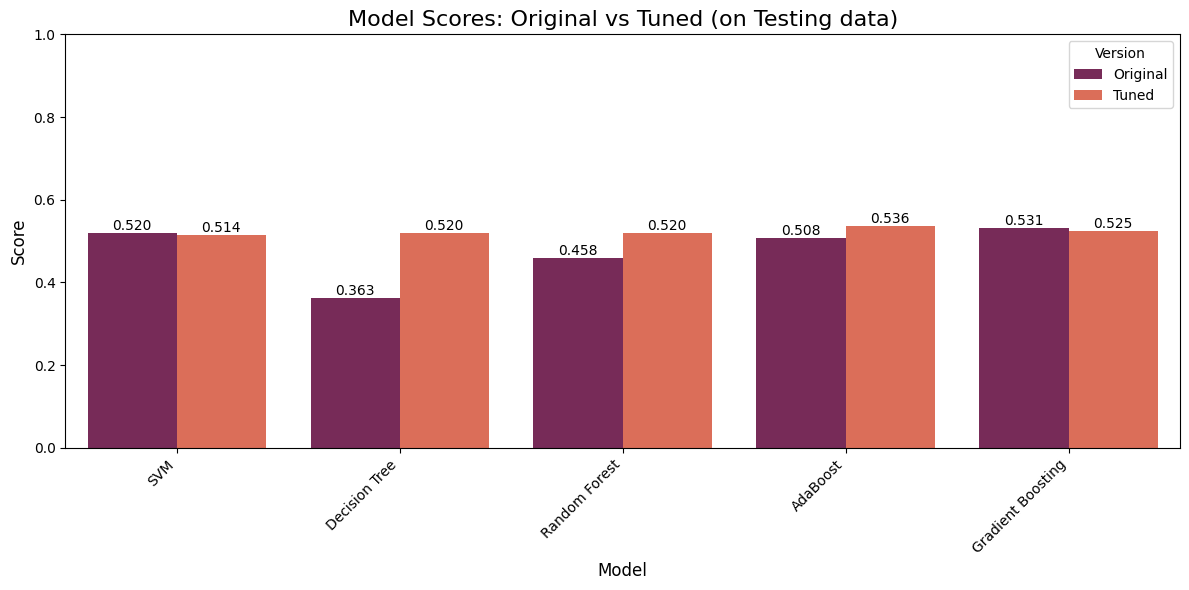

In [ ]:
# Double bar plot to compare performance of tuned and untuned models on testing data

df = pd.DataFrame({
    'Model': list(model_scores_test.keys()),
    'Original': list(model_scores_test.values()),
    'Tuned': list(hyperparam_tuned_test_modelscores.values())
})

# Melt the DataFrame to long format
df_melted = pd.melt(df, id_vars=['Model'], var_name='Version', value_name='Score')

# Create the double bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Score', hue='Version', data=df_melted, palette='rocket')
plt.title('Model Scores: Original vs Tuned (on Testing data)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.3f', label_type='edge')

plt.legend(title='Version')
plt.tight_layout()
plt.show()

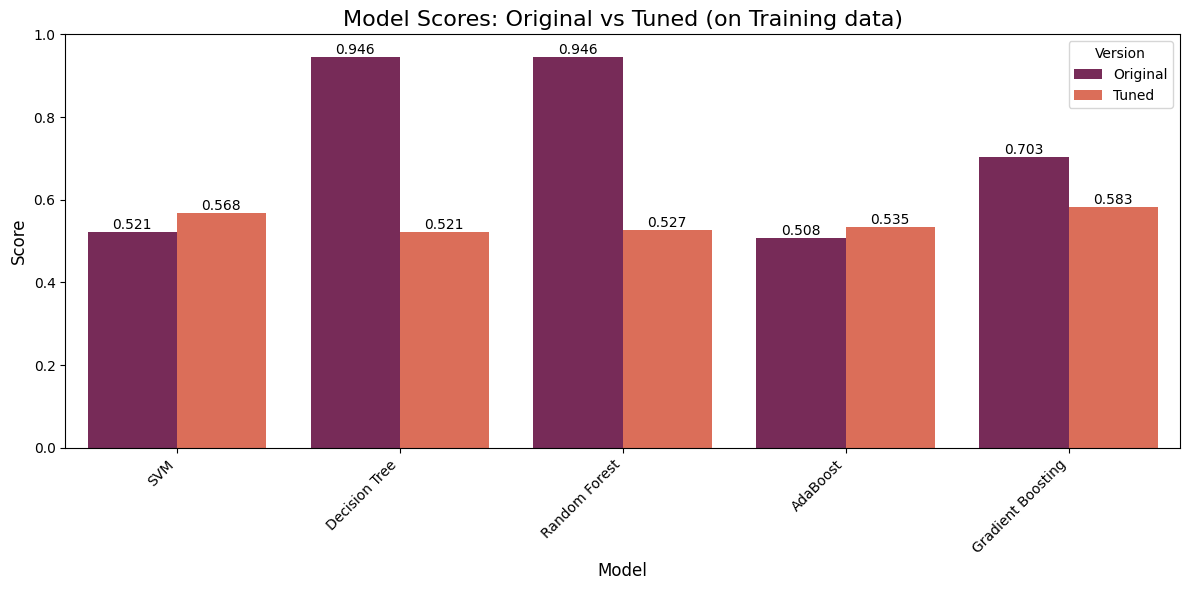

In [ ]:
# Double bar plot to compare performance of tuned and untuned models on training data

df = pd.DataFrame({
    'Model': list(model_scores_train.keys()),
    'Original': list(model_scores_train.values()),
    'Tuned': list(hyperparam_tuned_train_modelscores.values())
})

# Melt the DataFrame to long format
df_melted = pd.melt(df, id_vars=['Model'], var_name='Version', value_name='Score')

# Create the double bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Score', hue='Version', data=df_melted, palette='rocket')
plt.title('Model Scores: Original vs Tuned (on Training data)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.3f', label_type='edge')

plt.legend(title='Version')
plt.tight_layout()
plt.show()

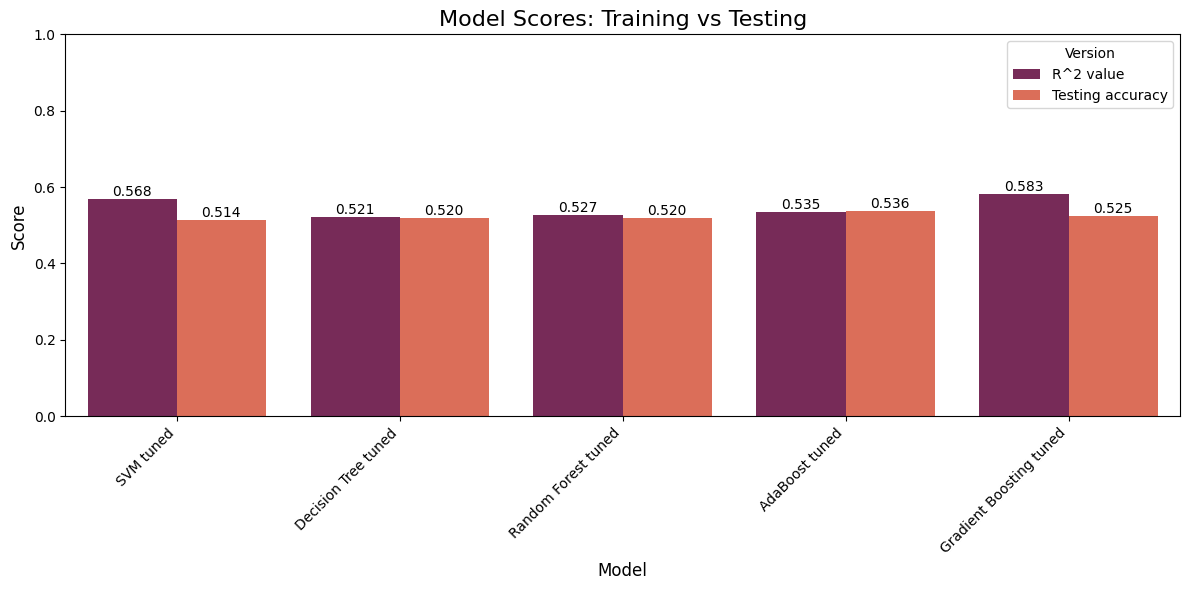

In [ ]:
# Creating a double bar plot between testing and training data performance with tuned models

df = pd.DataFrame({
    'Model': list(hyperparam_tuned_train_modelscores.keys()),
    'R^2 value': list(hyperparam_tuned_train_modelscores.values()),
    'Testing accuracy': list(hyperparam_tuned_test_modelscores.values())
})

# Melt the DataFrame to long format
df_melted = pd.melt(df, id_vars=['Model'], var_name='Version', value_name='Score')

# Create the double bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Model', y='Score', hue='Version', data=df_melted, palette='rocket')
plt.title('Model Scores: Training vs Testing', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.3f', label_type='edge')

plt.legend(title='Version')
plt.tight_layout()
plt.show()

In [ ]:
# Table to visualize difference in model performance

df_perf = pd.DataFrame({
    'Model': list(model_scores_test.keys()),
    'Original': list(model_scores_test.values()),
    'Tuned': list(hyperparam_tuned_test_modelscores.values())
})

df['Percentage difference'] = (df['Tuned'] - df['Original']) / df['Original'] * 100
df

,Model,Original,Tuned,Percentage difference
0,SVM,0.519553,0.513966,-1.075269
1,Decision Tree,0.363128,0.519553,43.076923
2,Random Forest,0.458101,0.519553,13.414634
3,AdaBoost,0.508380,0.536313,5.494505
4,Gradient Boosting,0.530726,0.525140,-1.052632


In [ ]:
# Find the index of the row with the highest 'Tuned' value
index_of_best_tuned = df['Tuned'].idxmax()
index_of_best_original = df['Original'].idxmax()

# Get the model name corresponding to that index
best_tuned_model = df.loc[index_of_best_tuned, 'Model']
best_original_model = df.loc[index_of_best_original, 'Model']

print(f'Best performer without hyperparameter tuning: {best_original_model}')
print(f'Best performer with hyperparameter tuning: {best_tuned_model}')

Best performer without hyperparameter tuning: Gradient Boosting
Best performer with hyperparameter tuning: AdaBoost


# Feature Reduction

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=7)
pca2.fit(X_train)

X_train_7D_pca = pca2.transform(X_train)
X_test_7D_pca = pca2.transform(X_test)

In [ ]:
adaboost_search_red = RandomizedSearchCV(adaBoost, ada_params, cv=5, n_iter=100, random_state=42, verbose=1)
adaboost_search_red.fit(X_train_7D_pca, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79f7cc637d00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79f7d1671c30>},
                   random_state=42, verbose=1)

In [ ]:
print(f'Score of best performing model with PCA on training set: {adaboost_search_red.score(X_train_7D_pca, y_train)}')
print(f'Best parameters: {adaboost_search_red.best_params_}')
print(f'Best score: {adaboost_search_red.best_score_}')

print(f'Score of best performing model with PCA on testing set: {adaboost_search_red.score(X_test_7D_pca, y_test)}')

Score of best performing model with PCA on training set: 0.5233644859813084
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.15092422497476266, 'n_estimators': 64}
Best score: 0.5233644859813084
Score of best performing model with PCA on testing set: 0.5251396648044693


As we can see, this model does not perform better than the model without PCA application.

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(percentile=50)
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

adaboost_search_fs = RandomizedSearchCV(adaBoost, ada_params, cv=5, n_iter=100, random_state=42, verbose=1)
adaboost_search_fs.fit(X_train_selected, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79f7cc637d00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79f7d1671c30>},
                   random_state=42, verbose=1)

In [ ]:
print(f'Score of best performing model with Feature Selection on training set: {adaboost_search_fs.score(X_train_selected, y_train)}')
print(f'Best parameters: {adaboost_search_fs.best_params_}')
print(f'Best score: {adaboost_search_fs.best_score_}')

print(f'Score of best performing model with Feature Selection on testing set: {adaboost_search_fs.score(X_test_selected, y_test)}')

Score of best performing model with Feature Selection on training set: 0.5345794392523364
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5514479738275658, 'n_estimators': 347}
Best score: 0.5345794392523364
Score of best performing model with Feature Selection on testing set: 0.5586592178770949


In [ ]:
# Get the boolean mask of selected features
selected_indices = selector.get_support()

# Assuming X_train is your original feature set
df_x = pd.DataFrame(X_train)

# Get the names of selected features
selected_feature_names = df_x.columns[selected_indices].tolist()

df = df.drop(['Number of Doctors Visited', 'Age'], axis='columns')
# If you want to see the selected features data
selected_features = df_x.loc[:, selected_indices]

print("Selected feature names:")
print(df.columns[selected_feature_names])

Selected feature names:
Index(['Phyiscal Health', 'Dental Health', 'Employment',
       'Medication Keeps Patient from Sleeping', 'Trouble Sleeping',
       'Prescription Sleep Medication'],
      dtype='object')


Feature selection has worked the best, giving a score of 0.5586, highest amongst all the models we've tried.

# Final Insights

After a ton of tuning we still end up with out models only predicting a little more than half the testing instances right. This is greatly concerning as even after hyperparameter tuning, our models only perform marginally better excluding Decision trees and Random Forest. Both of these models were the worst performers when they worked with default parameters but now they are at par with the other models.

There is a large discrepancy in untuned data between training and testing datasets which overfitting, especially in Random forest and decision tree models. This is not observed in tuned data, this means with hyperparameter tuning, we have tackled overfiting.

Feature selection working indicates messy data hence it gave the best score.

This performance could be again attributed to the drawbacks discussed in phase 1 and could also be as simple as the natture of the dataset. There seems to be somekind of threshold in the '0.5s' where all the models seem to be stuck. If you look at the visualisations, there is no apparent pattern for different classes, points in each class seem to be evenly spread out which could be the underlying issue.

Note:

1) Here, Random Search CV was chosen over Grid Search CV because there was no clear idea what values would fit the parameters best.

2) Standard scaling, filteration, dimensionality reduction, feature selection did not work as expected and delivered sub par scores.

3) n_iter was given values ranging from 100-1000 but only 100 is used in this notebook as computation time was extremely high as n_iter was increased.

4) Deeper data pre-processing was attempted - since there was an imbalance in the class-distribution in the data, Synthetic Minority Oversampling Technique was used but delivered sub par results.